# Regression spotting project

In [160]:
from pathlib import Path

import numpy as np
import pandas as pd
import sklearn.model_selection
from matplotlib import pyplot as plt
plt.style.use('dark_background')

In [161]:
# Paths:
input_dir = Path.cwd() / "../input_data"
plots_dir = Path.cwd() / "../plots"
plots_dir.mkdir(exist_ok=True)

## Loading data
Loading fingerprints, and molecule properties


In [162]:
# Load fingerprints:
fingerprints = pd.read_csv(input_dir / "fingerprints.csv", index_col=0)
fingerprints.sort_index(inplace=True)
# There seems to be some duplicates in the rows:
fingerprints.drop_duplicates(inplace=True)
# Save columns names:
fingerprints_cols = fingerprints.columns

fingerprints
# fingerprints.addu

,1,8,13,26,27,31,35,41,45,62,...,1977,1991,1992,1995,2001,2004,2018,2034,2038,2044
mol_name,,,,,,,,,,,,,,,,,,,,,
2-Oxoglutaric acid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3-Hydroxyanthranilic acid,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3-Hydroxymethylglutaric acid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3-Phosphoglyceric acid,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"4,5-Dihydroorotic acid",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xanthine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
alpha-tocopherol,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cis-Aconitic acid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
# Load properties:
mol_properties = pd.read_csv(input_dir / "physchem_properties.csv", index_col=0)
mol_properties.sort_index(inplace=True)
mol_properties.drop_duplicates(inplace=True)
# mol_properties.set_index("name_short", inplace=True)
mol_properties_cols = mol_properties.columns
mol_properties

,pka_strongest_acidic,pka_strongest_basic,polar_surface_area,polarizability,acceptor_count,donor_count,physiological_charge
name_short,,,,,,,
2-Oxoglutaric acid,2.66,-9.70,91.67,12.17,5.0,2.0,-2.0
3-Hydroxyanthranilic acid,1.94,4.82,83.55,14.18,4.0,3.0,-1.0
3-Hydroxymethylglutaric acid,3.68,-3.00,94.83,14.55,5.0,3.0,-2.0
3-Phosphoglyceric acid,1.30,-4.20,124.29,13.29,6.0,4.0,-3.0
"4,5-Dihydroorotic acid",3.28,-8.20,95.50,13.09,4.0,3.0,-1.0
...,...,...,...,...,...,...,...
Xanthine,7.95,-0.70,86.88,12.70,3.0,3.0,0.0
alpha-tocopherol,10.80,-4.90,29.46,55.29,2.0,1.0,0.0
cis-Aconitic acid,2.11,NaN,111.90,14.16,6.0,3.0,-3.0


Check statistics of molecular properties and handle NaN values:


/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_62871/367450840.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  mol_properties.hist(ax=ax)


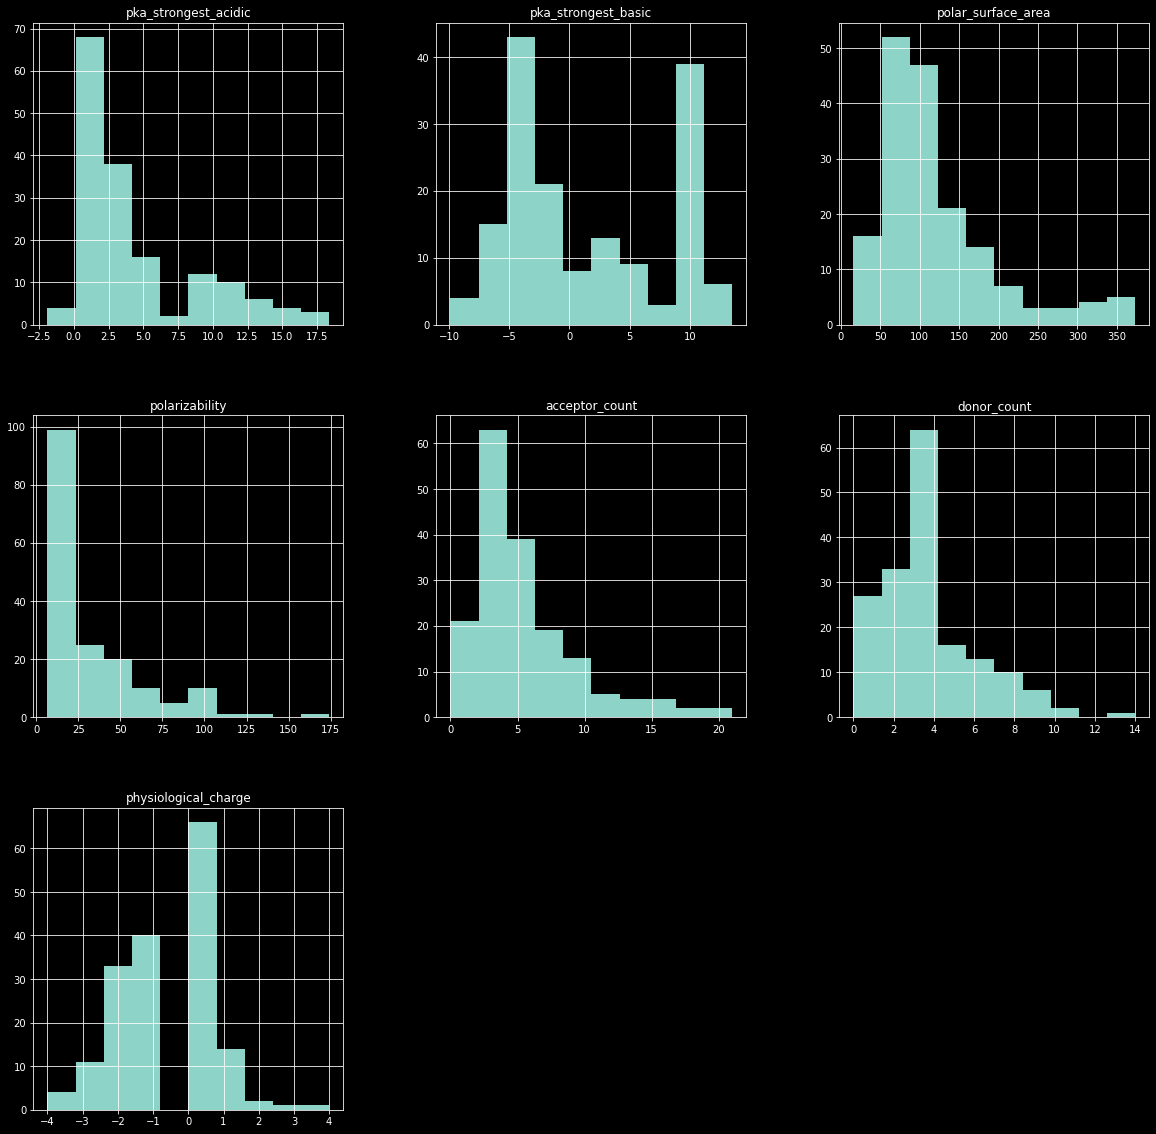

In [164]:
# Plot histograms:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
mol_properties.hist(ax=ax)
fig.savefig(plots_dir / "mol_features.pdf")

In [165]:
# Check for NaN values:
is_null = mol_properties.isnull()
for col in mol_properties_cols:
    print("---")
    print(is_null[col].value_counts())

# FIXME: temporarely set NaN to zero
mol_properties[is_null] = 0.

---
False    163
True       9
Name: pka_strongest_acidic, dtype: int64
---
False    161
True      11
Name: pka_strongest_basic, dtype: int64
---
False    172
Name: polar_surface_area, dtype: int64
---
False    172
Name: polarizability, dtype: int64
---
False    172
Name: acceptor_count, dtype: int64
---
False    172
Name: donor_count, dtype: int64
---
False    172
Name: physiological_charge, dtype: int64


In [166]:
# Perform some basic checks:
assert fingerprints.index.is_unique
assert mol_properties.index.is_unique

In [167]:
print("Number of fingerprints: ", len(fingerprints))
print("Number of mol properties: ", len(mol_properties))

print("Molecules with missing fingerprints: ")
missing_molecules = list(mol_properties[~ mol_properties.index.isin(fingerprints.index)].index)
print(missing_molecules)

# min(fingerprints.iloc[3, ] == fingerprints.iloc[4, ])


Number of fingerprints:  169
Number of mol properties:  172
Molecules with missing fingerprints: 
['Adenosine triphosphate', 'Ribose 5-phosphate', 'Spermine']


Merge fingerprints and properties:

In [168]:
all_mol_features = pd.merge(mol_properties, fingerprints, how="inner", right_index=True, left_index=True)
all_mol_features


,pka_strongest_acidic,pka_strongest_basic,polar_surface_area,polarizability,acceptor_count,donor_count,physiological_charge,1,8,13,...,1977,1991,1992,1995,2001,2004,2018,2034,2038,2044
2-Oxoglutaric acid,2.66,-9.70,91.67,12.17,5.0,2.0,-2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3-Hydroxyanthranilic acid,1.94,4.82,83.55,14.18,4.0,3.0,-1.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3-Hydroxymethylglutaric acid,3.68,-3.00,94.83,14.55,5.0,3.0,-2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3-Phosphoglyceric acid,1.30,-4.20,124.29,13.29,6.0,4.0,-3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
"4,5-Dihydroorotic acid",3.28,-8.20,95.50,13.09,4.0,3.0,-1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xanthine,7.95,-0.70,86.88,12.70,3.0,3.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
alpha-tocopherol,10.80,-4.90,29.46,55.29,2.0,1.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
cis-Aconitic acid,2.11,0.00,111.90,14.16,6.0,3.0,-3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gamma-Aminobutyric acid,4.53,10.22,63.32,10.62,3.0,2.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Loading intensities

In [169]:
# Intensities:
intensities = pd.read_csv(input_dir / "3june22_ions_no_nl.csv", index_col=0)
intensities.head()

,Matrix short,Polarity,adduct,name_short,detected,spot_intensity
0,9AA,negative,+Cl,2-Oxoglutaric acid,0,0.00000
1,9AA,negative,+Cl,3-Hydroxyanthranilic acid,1,41.60611
2,9AA,negative,+Cl,3-Hydroxymethylglutaric acid,0,0.00000
3,9AA,negative,+Cl,3-Phosphoglyceric acid,0,0.00000
4,9AA,negative,+Cl,"4,5-Dihydroorotic acid",1,160.79555


In [170]:
# Sanity checks:
nb_before = len(intensities.name_short.unique())

# Delete molecules with missing properties:
intensities = intensities[~intensities.name_short.isin(missing_molecules)]
print("{}/{} molecules kept".format(len(intensities.name_short.unique()), nb_before))

169/172 molecules kept


Get statistics about adducts:




/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_62871/815723199.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  std_intesities.hist(column=["detected"], by=['Matrix short', "Polarity"], grid=False, ax=ax)


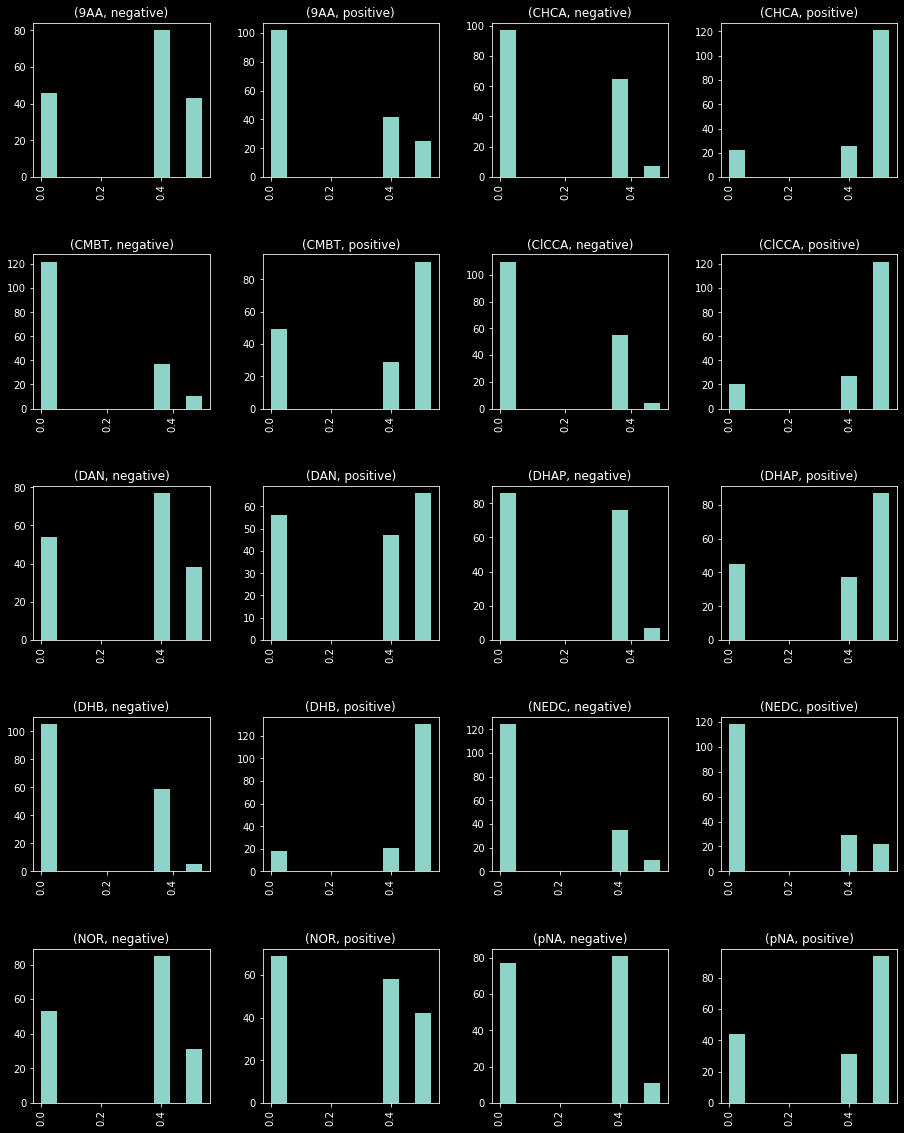

In [223]:
std_intesities = intensities.groupby(['Matrix short', "Polarity", "name_short"], as_index=False).std()

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
std_intesities.hist(column=["detected"], by=['Matrix short', "Polarity"], grid=False, ax=ax)
fig.savefig(plots_dir / "std_detected_value.pdf")



In [221]:
# Check if entries with std=0 are always not detected:
std_intesities[std_intesities["detected"] == 0]["spot_intensity"].value_counts()

0.0    1417
Name: spot_intensity, dtype: int64

**Conclusion**: Intensities always vary across adducts (in histograms, std=0 entries were never detected for any adducts)



## Create train/val split

First, binarize the molecule features:

/var/folders/xw/tcy65hq13818_4913hhp666h0000gq/T/ipykernel_62871/2388856540.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  mol_properties.hist(ax=ax, bins=2)


array([[<AxesSubplot:title={'center':'pka_strongest_acidic'}>,
        <AxesSubplot:title={'center':'pka_strongest_basic'}>,
        <AxesSubplot:title={'center':'polar_surface_area'}>],
       [<AxesSubplot:title={'center':'polarizability'}>,
        <AxesSubplot:title={'center':'acceptor_count'}>,
        <AxesSubplot:title={'center':'donor_count'}>],
       [<AxesSubplot:title={'center':'physiological_charge'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

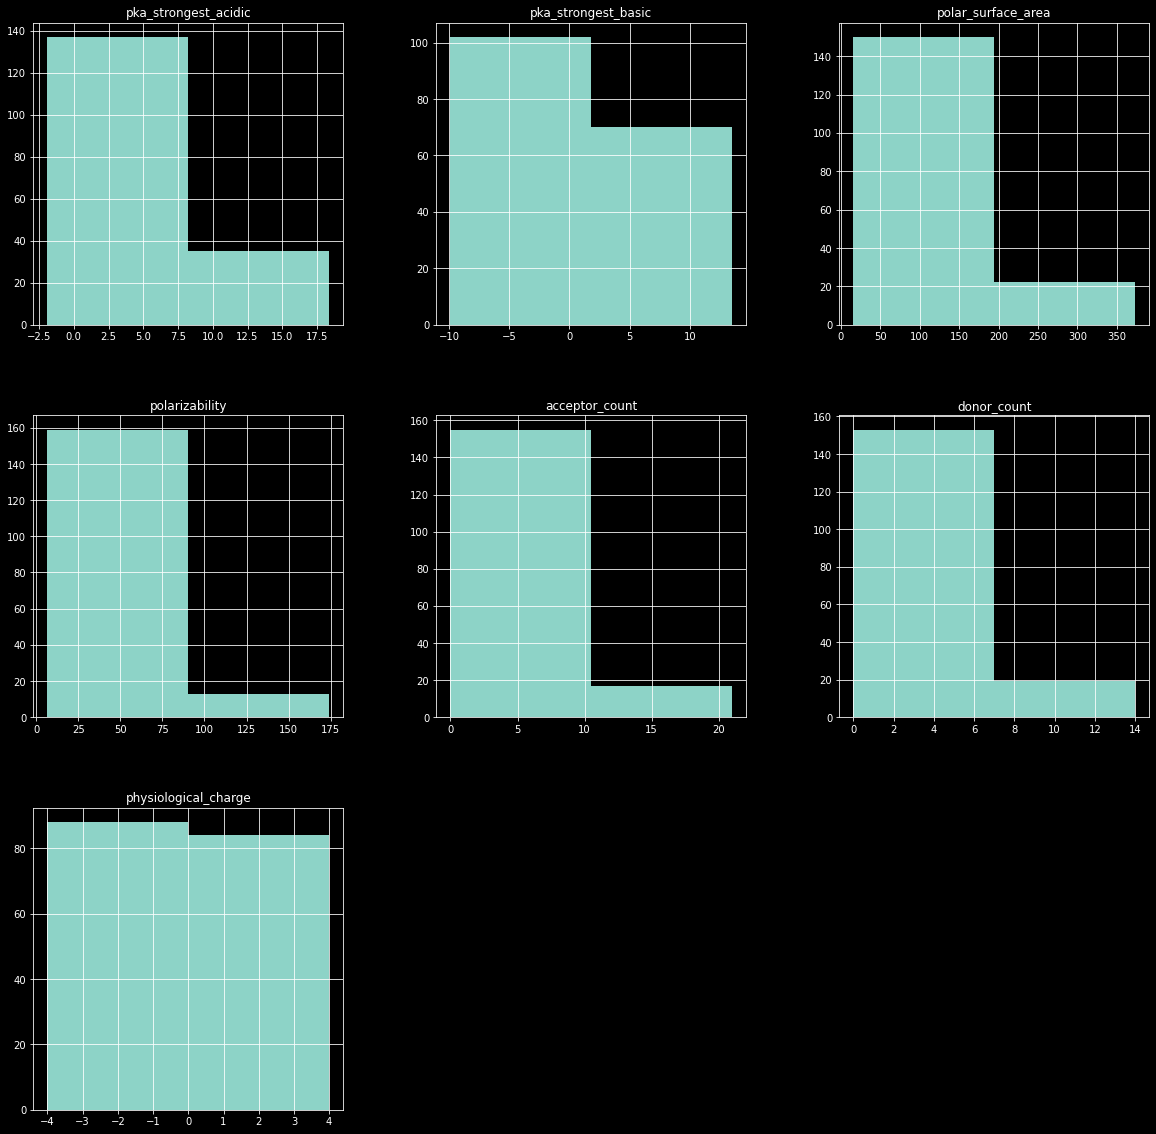

In [228]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
mol_properties.hist(ax=ax, bins=2)

In [230]:
digitized_mol_properties = all_mol_features[mol_properties_cols].copy()
for col in mol_properties_cols:
    _, division = np.histogram(all_mol_features[col], bins=2)
    print(col, division)
    # Make sure to include the last point in the last bin (without creating a new class):
    division[-1] += 1
    digitized_mol_properties[col] = np.digitize(all_mol_features[col], division)

# digitized_mol_properties
digitized_mol_properties.value_counts()
# digitized_mol_properties[digitized_mol_properties["polarizability"] == 2]
# all_mol_features[all_mol_features.index == "Cardiolipin 18:1"]


pka_strongest_acidic [-1.9   8.24 18.38]
pka_strongest_basic [-9.9    1.815 13.53 ]
polar_surface_area [ 15.79 194.6  373.41]
polarizability [  6.65  90.41 174.17]
acceptor_count [ 0.  10.5 21. ]
donor_count [ 0.  7. 14.]
physiological_charge [-4.  -0.5  3. ]


pka_strongest_acidic  pka_strongest_basic  polar_surface_area  polarizability  acceptor_count  donor_count  physiological_charge
1                     1                    1                   1               1               1            1                       46
                      2                    1                   1               1               1            2                       31
2                     1                    1                   1               1               1            2                       23
1                     1                    1                   1               1               1            2                       13
                      2                    1                   1               1               1            1                       13
2                     2                    1                   1               1               1            2                       11
1                     2                    2                 

Since not all the bins have enough datapoints, use quantiles to define the size of the bins:

In [234]:
digitized_mol_properties = all_mol_features[mol_properties_cols].copy()
# for col in mol_properties_cols:
pd.qcut(all_mol_features[mol_properties_cols[0]], q=3, labels=["good", "medium", "bad"])

# TODO: to be continued

2-Oxoglutaric acid              medium
3-Hydroxyanthranilic acid       medium
3-Hydroxymethylglutaric acid    medium
3-Phosphoglyceric acid            good
4,5-Dihydroorotic acid          medium
                                 ...  
Xanthine                           bad
alpha-tocopherol                   bad
cis-Aconitic acid               medium
gamma-Aminobutyric acid            bad
myo-Inositol                       bad
Name: pka_strongest_acidic, Length: 169, dtype: category
Categories (3, object): ['good' < 'medium' < 'bad']

In [130]:
# sklearn.model_selection.train_test_split(intensities)


